## Homework 1-2: Introduction to Webscraping with BeautifulSoup 

介绍使用BeautifulSoup进行网上冲浪


Sometimes the most interesting data sets don’t come with an API or pre-packaged plain-text CSVs. In these situations, web scraping can be a powerful tool, enabling us to extract and convert data from almost any format found on the internet into a tabular form we can conduct further analysis on. 
有时，最有趣的数据集没有API或预打包的纯文本CSV。在这些情况下，网络抓取是一个强大的工具，使我们能够从互联网上发现的几乎任何格式中提取数据，并将其转换为表格形式，以便进行进一步分析。

For this section we will be working with historic population estimates of different US states listed on Wikipedia 在本节中，我们将使用维基百科上列出的美国不同州的历史人口估计：

here:https://en.wikipedia.org/wiki/List_of_U.S._states_by_historical_population. 

In this section, you’ll learn how to import html-tables on the web into something you can manipulate with pandas. 在本节中，您将学习如何将web上的html表导入到可以使用pandas操作的内容中。

Specifically, we will: 
    
    1. Download the relevant webpage as raw html with the requests library  
    使用请求库下载原始html格式的相关网页
    
    2. Parse the html into a tree-like python-object with the BeautifulSoup library
    使用BeautifulSoup库将html解析为类似于树的python对象
    
    3. Use BeautifulSoup to select and extract just the tables we’re interested in
    使用BeautifulSoup仅选择和提取我们感兴趣的表
    
    4. Combine the tables, clean the text, and convert them into a single python dictionary 
    合并表，清理文本，并将它们转换为单个python字典
    
    5. Make a pandas dataframe from the dictionary 
    从字典中创建一个数据帧
    
    6. Doing some basic analysis and plotting (with matplotlib) 
    进行一些基本分析和绘图（使用matplotlib）

As usual, our first step is to import the necessary libraries.
通常，我们的第一步是导入必要的库。

In [2]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# Two new 
import requests 
requests.packages.urllib3.disable_warnings()
#Requests enables us to download raw html as text
from bs4 import BeautifulSoup 
# BeautifulSoup enables us to navigate html in python with dom-like tree structure 

## Step 1: Download the relevant webpage as raw html
步骤1：以原始html格式下载相关网页

In [4]:
#在本地读取静态网页
import urllib.request

url='file:///E:\code\互联网大数据获取第一次作业\wiki.html'
r=urllib.request.urlopen(url).read()
print(r)

b'<!DOCTYPE html>\r\n<html class="client-nojs" lang="en" dir="ltr">\r\n<head>\r\n<meta charset="UTF-8"/>\r\n<title>List of U.S. states and territories by historical population - Wikipedia</title>\r\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"fe13ea58-cef8-46e8-a836-9aefbd92056e","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_U.S._states_and_territories_by_historical_population","wgTitle":"List of U.S. states and territories by historical population","wgCurRevisionId":1047434610,"wgRevisionId":1047434610,"wgArticleId":30259061,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles

Always remember to “not to be evil” when scraping with requests! If downloading multiple pages, always put a delay between requests (e.g,, time.sleep(1), with the time library) so you don’t unwittingly hammer someone’s webserver and/or get blocked.

在处理请求时，请始终记住“不要作恶！”！如果下载多个页面，请始终在请求之间设置延迟（例如，time.sleep（1），使用时间库），这样您就不会无意中敲打某人的Web服务器和/或被阻止。

Now, we have all our data in the notebook. Unfortunately, it is the form of one really long string, which is hard to work with directly. This is where BeautifulSoup comes in.  现在，我们所有的数据都在笔记本上了。不幸的是，它是一个非常长的字符串的形式，很难直接使用。这就是BeautifulSoup的用武之地。

步骤2：使用BeautifulSoup解析html
## Step 2: Parse the html with BeautifulSoup

In [6]:
soup = BeautifulSoup(r, 'html.parser') #html.parser 是html分离器

Key BeautifulSoup functions we’ll be using in this section:
我们将在本节中使用的关键BeautifulSoup函数：

- **soup.prettify()**: Returns cleanedup version of raw html for printing
返回用于打印的原始html的处理美化版本

- **soup.find_all(<htmltag>,attrs=<attributes>)**: Returns python list of matching objects
    返回匹配对象的python列表
    
- **soup.find(<htmltag>,attrs=<attributes>)**: Returns first matching object 
    返回第一个匹配的对象
    
- **soup.text/soup.get_text()**: Returns visible text of an object (e.g.,"`<p>Some text</p>`" -> "Some text")
   返回对象的可见文本
    
BeautifulSoup is a very powerful library -- much more info here: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

### Let's practice some BeautifulSoup commands.. 

**Print a cleanedup version of raw html for printing**

打印用于打印的原始html的干净版本

In [7]:
# Your code here  
cleanedup_version=soup.prettify()
print(cleanedup_version)

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of U.S. states and territories by historical population - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"fe13ea58-cef8-46e8-a836-9aefbd92056e","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_U.S._states_and_territories_by_historical_population","wgTitle":"List of U.S. states and territories by historical population","wgCurRevisionId":1047434610,"wgRevisionId":1047434610,"wgArticleId":30259061,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Article

** Find the first “title” object ** 

查找第一个“title”对象

In [8]:
# Your code here

title=soup.find('title')
print(title)

<title>List of U.S. states and territories by historical population - Wikipedia</title>


** Find the text of first “title” object ** 

text查找第一个“title”对象的文本

In [9]:
# Your code here

title=soup.find('title').text
print(title)

List of U.S. states and territories by historical population - Wikipedia



## Step 3: extract just the tables we’re interested in 

只提取我们感兴趣的表

In [21]:
tables = soup.find_all("table",attrs={"class":"wikitable"})
#  这表示返回所有表对象的列表，其中包括
#  他在soup对象中创建了css class“wikitable”。
print(len(tables))
print(tables)

7
[<table class="wikitable sortable" style="text-align:right;">
<tbody><tr>
<th>Name
</th>
<th>Admitted<sup class="reference" id="cite_ref-date_4-0"><a href="#cite_note-date-4">[d]</a></sup>
</th>
<th>1790
</th>
<th>1800
</th>
<th>1810
</th>
<th>1820
</th>
<th>1830
</th>
<th>1840
</th>
<th>1850
</th>
<th>1860
</th></tr>
<tr>
<td align="left" height="13"><b><span class="flagicon"><img alt="" class="thumbborder" data-file-height="400" data-file-width="600" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Alabama.svg/23px-Flag_of_Alabama.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Alabama.svg/35px-Flag_of_Alabama.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Alabama.svg/45px-Flag_of_Alabama.svg.png 2x" width="23"/> </span><a href="/wiki/Alabama" title="Alabama">Alabama</a></b>
</td>
<td align="center">1819
</td>
<td style="background-color:#D9D9D9"> 
</td>
<td style="background-color:

As it turns out, the data we’re interested in is in the 1st, 3rd, and 4th wikitable table on the page. 

事实证明，我们感兴趣的数据位于页面上的第一、第三和第四个wikitable表中。

In [22]:
tables = [tables[0], tables[2], tables[3]]
len(tables)


3

## Step 4: Convert the html tables into a python dictionary 

将html表转换为python字典

Before we can think about how to extract what we need, we need to understand how tables are constructed in HTML...

在我们考虑如何提取所需内容之前，我们需要了解如何在HTML中构造表。。。

In [23]:
from IPython.core.display import display, HTML
display(HTML("""<table>
  <tr>
    <th>Firstname</th>
    <th>Lastname</th> 
    <th>Age</th>
  </tr>
  <tr>
    <td>Jill</td>
    <td>Smith</td> 
    <td>50</td>
  </tr>
  <tr>
    <td>Eve</td>
    <td>Jackson</td> 
    <td>94</td>
  </tr>
</table>"""))

Firstname,Lastname,Age
Jill,Smith,50
Eve,Jackson,94


Now let’s look at the first table in the list of tables we’re trying to import.

现在让我们看一下要导入的表列表中的第一个表。

In [26]:
# Let's render the first table as HTML
#让我们将第一个表呈现为HTML

from IPython.core.display import display, HTML
display(HTML(tables[0].prettify()))#取tables第一项，做美化（prettify）

Name,Admitted [d],1790,1800,1810,1820,1830,1840,1850,1860
Alabama,1819,,"1,250","9,046","127,901","309,527","590,756","771,623","964,201"
Alaska,1959,,,,,,,,
American Samoa,1900,,,,,,,,
Arizona,1912,,,,,,,,
Arkansas,1836,,,"1,062","14,273","30,388","97,574","209,897","435,450"
California,1850,,,,,,,"92,597","379,994"
Colorado,1876,,,,,,,,"34,277"
Connecticut,1788,"237,946","251,002","262,042","275,202","297,675","309,978","370,792","460,147"
Delaware,1787,"59,096","64,273","72,674","72,749","76,748","78,085","91,532","112,216"
"<img alt="""" class=""thumbborder"" data-file-height=""400"" data-file-width=""800"" decoding=""async"" height=""12"" src=""//upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Flag_of_the_District_of_Columbia.svg/23px-Flag_of_the_District_of_Columbia.svg.png"" srcset=""//upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Flag_of_the_District_of_Columbia.svg/35px-Flag_of_the_District_of_Columbia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Flag_of_the_District_of_Columbia.svg/46px-Flag_of_the_District_of_Columbia.svg.png 2x"" width=""23""/> District of Columbia [e]",1790,,"8,144","15,471","23,336","30,261","33,745","51,687","75,080"


Our goal is to associate a series of population values with each state, so that we can build a time series table across all three tables. Things to keep in mind while building our extract routine:

我们的目标是将一系列人口值与每个州相关联，这样我们就可以跨所有三个表构建一个时间序列表。构建提取例程时要记住的事项：


    - We don’t care about the “admitted” column 
    -我们不在乎“admitted”一栏
    
    - We want to remove the commas from the numbers so python interprets them as ints rather than strings 
    我们希望从数字中删除逗号，以便python将它们解释为int而不是字符串
    
    - We want to remove the footnotes and links 
    我们想删除脚注和链接

Now, let’s try to extract out our data…

In [47]:
#判断字符串是否全是数字组成
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
    
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError,ValueError):
        pass
    
    return False

In [55]:
def rm_footnotes(s): #删除脚注
    """
    Removes any text after first '[' in string
    删除字符串中第一个“[”之后的任何文本
    
    District of Columbia[1] -> District of Columbia
    """
    # Your code here 
    index=s.find("[")
    s=s[:index] #用切片操作，过滤“[”之后的文本
    return s
  
    
# 从字符串中删除任何逗号或脚注并转换为int。
def clean_int(s):
    """Removes any commas or footnotes from string and converts to int.
       Returns zero for blank strings对于空字符串，返回零       """
    
    s = s.replace(',', '').replace('\n','').replace('\r','') #并且去掉\n和\r
       
    if is_number(s)==True:
        return int(s)
    else:
        return 0

In [56]:
d = dict()

for table in tables:
    """Extracts population data for states from all tables in tables 
      and store it in single dictionary d
      从表中的所有表中提取州的人口数据,并将其存储在单个字典d中
      """
    # 提取表头
    headrow = table.find("tr")
    
    
    # 得到表头中的年份作为列名
    col_names = [(idx,th.text.replace('\n','').replace('\r','')) for idx,th in enumerate(headrow.find_all('th')) if is_number(th.text)==True]
    # Makes list of tuples(元组) like this with idx and name for cols with years.
    # By using isnumeric, we only include columns are that are years. 
    # Result looks like this: 
    # [(2, '1790'), (3, '1800'), (4, '1810')]                     
    
    # 得到其他行
    rows = table.find_all("tr")[1:]
    # List of rows in table excluding the header row 
    
    for row in rows:
        state_name = rm_footnotes(row.find('td').text)
        # String of state name, with any footnotes removed 状态名称字符串，删除任何脚注
        
        all_cells = [c.text.replace('\n','').replace('\r','') for c in row.find_all('td')]
        # List of cell values for row, e.g.: 行的单元格值列表例如：
        # ['Alabama', '1819', '\xa0', '1,250', '9,046' .. ] 
        
        existing_values = d.get(state_name,{})
        # Existing dict of values for given state 给定状态的现有值目录
        
        new_values = {year:clean_int(all_cells[idx]) for (idx,year) in col_names}
        # For cols listed in col_names, return dict of cleaned int values 
        # {'1790': 0, '1800': 1250, '1810': 9046...}
        
        existing_values.update(new_values)
        # Merge with existing dict for state 
        d[state_name] = existing_values
d

{'\xa0Alabama': {'1790': 0,
  '1800': 1250,
  '1810': 9046,
  '1820': 127901,
  '1830': 309527,
  '1840': 590756,
  '1850': 771623,
  '1860': 964201,
  '1870': 996992,
  '1880': 1262505,
  '1900': 1828697,
  '1910': 2138093,
  '1920': 2348174,
  '1930': 2646248,
  '1940': 2832961,
  '1950': 3061743,
  '1960': 3266740,
  '1970': 3444165,
  '1980': 3893888,
  '1990': 4040587,
  '2000': 4447100,
  '2010': 4779736,
  '2020': 5024279},
 '\xa0Alaska': {'1790': 0,
  '1800': 0,
  '1810': 0,
  '1820': 0,
  '1830': 0,
  '1840': 0,
  '1850': 0,
  '1860': 0,
  '1870': 0,
  '1880': 33426,
  '1900': 63592,
  '1910': 64356,
  '1920': 55036,
  '1930': 59278,
  '1940': 72524,
  '1950': 128643,
  '1960': 226167,
  '1970': 300382,
  '1980': 401851,
  '1990': 550043,
  '2000': 626932,
  '2010': 710231,
  '2020': 733391},
 '\xa0American Samoa': {'1790': 0,
  '1800': 0,
  '1810': 0,
  '1820': 0,
  '1830': 0,
  '1840': 0,
  '1850': 0,
  '1860': 0,
  '1870': 0,
  '1880': 0,
  '1900': 0,
  '1910': 0,
  '1920':

## Step 5: Make a pandas dataframe from the dictionary 
从字典中创建一个数据帧


Now that we have all three tables in a cleaned dictionary form, with each state as a key, and time series for each sate (as another dict) as it’s value, it's simple to convert to a pandas DataFrame.

现在我们有了所有三个表，它们都是干净的字典形式，每个状态作为一个键，每个状态的时间序列（作为另一个dict）作为它的值，转换为数据帧就很简单了。

In [61]:
df = pd.DataFrame.from_dict(d,orient='index') #将Dict转换为DataFrame对象
"""
参数：
   data ：字典或类似数组的对象来创建DataFrame。
   orient ：数据的方向。 允许值为(‘columns’, ‘index’)，默认是‘columns’
   
"""
df

,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
Alabama,0.0,1250.0,9046.0,127901.0,309527.0,590756.0,771623.0,964201.0,996992.0,1262505.0,1828697.0,2138093.0,2348174.0,2646248.0,2832961.0,3061743.0,3266740.0,3444165.0,3893888.0,4040587.0,4447100.0,4779736.0,5024279.0
Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33426.0,63592.0,64356.0,55036.0,59278.0,72524.0,128643.0,226167.0,300382.0,401851.0,550043.0,626932.0,710231.0,733391.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8056.0,10055.0,12908.0,24889.0,20051.0,27159.0,32297.0,46773.0,57291.0,55519.0,0.0
Arizona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9658.0,40440.0,122931.0,204354.0,334162.0,435573.0,499261.0,749587.0,1302161.0,1770900.0,2718215.0,3665228.0,5130632.0,6392017.0,7151502.0
Arkansas,0.0,0.0,1062.0,14273.0,30388.0,97574.0,209897.0,435450.0,484471.0,802525.0,1311564.0,1574449.0,1752204.0,1854482.0,1949387.0,1909511.0,1786272.0,1923295.0,2286435.0,2350725.0,2673400.0,2915918.0,3011524.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vermont,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330551.0,332286.0,343641.0,355956.0,352428.0,359611.0,359231.0,377747.0,389881.0,444330.0,511456.0,562758.0,608827.0,625741.0,643077.0
Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1225163.0,1512565.0,1854184.0,2061612.0,2309187.0,2421851.0,2677773.0,3318680.0,3966949.0,4648494.0,5346818.0,6187358.0,7078515.0,8001024.0,8631393.0
Washington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23955.0,75116.0,518103.0,1141990.0,1356621.0,1563396.0,1736191.0,2378963.0,2853214.0,3409169.0,4132156.0,4866692.0,5894121.0,6724540.0,7705281.0
West Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442014.0,618457.0,958800.0,1221119.0,1463701.0,1729205.0,1901974.0,2005552.0,1860421.0,1744237.0,1949644.0,1793477.0,1808344.0,1852994.0,1793716.0


This looks pretty good! However, we’ve accidently imported the total row (United States). We could address that in our function above, or just drop it from our dataframe.  

这看起来不错！但是，我们意外地导入了总计行（美国）。我们可以在上面的函数中解决这个问题，或者从数据帧中删除它。

In [64]:
df = df.drop(["\xa0United States"])  #删除含有指定元素的行或列，或删除指定行，列
df

,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
Alabama,0.0,1250.0,9046.0,127901.0,309527.0,590756.0,771623.0,964201.0,996992.0,1262505.0,1828697.0,2138093.0,2348174.0,2646248.0,2832961.0,3061743.0,3266740.0,3444165.0,3893888.0,4040587.0,4447100.0,4779736.0,5024279.0
Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33426.0,63592.0,64356.0,55036.0,59278.0,72524.0,128643.0,226167.0,300382.0,401851.0,550043.0,626932.0,710231.0,733391.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8056.0,10055.0,12908.0,24889.0,20051.0,27159.0,32297.0,46773.0,57291.0,55519.0,0.0
Arizona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9658.0,40440.0,122931.0,204354.0,334162.0,435573.0,499261.0,749587.0,1302161.0,1770900.0,2718215.0,3665228.0,5130632.0,6392017.0,7151502.0
Arkansas,0.0,0.0,1062.0,14273.0,30388.0,97574.0,209897.0,435450.0,484471.0,802525.0,1311564.0,1574449.0,1752204.0,1854482.0,1949387.0,1909511.0,1786272.0,1923295.0,2286435.0,2350725.0,2673400.0,2915918.0,3011524.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vermont,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330551.0,332286.0,343641.0,355956.0,352428.0,359611.0,359231.0,377747.0,389881.0,444330.0,511456.0,562758.0,608827.0,625741.0,643077.0
Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1225163.0,1512565.0,1854184.0,2061612.0,2309187.0,2421851.0,2677773.0,3318680.0,3966949.0,4648494.0,5346818.0,6187358.0,7078515.0,8001024.0,8631393.0
Washington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23955.0,75116.0,518103.0,1141990.0,1356621.0,1563396.0,1736191.0,2378963.0,2853214.0,3409169.0,4132156.0,4866692.0,5894121.0,6724540.0,7705281.0
West Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442014.0,618457.0,958800.0,1221119.0,1463701.0,1729205.0,1901974.0,2005552.0,1860421.0,1744237.0,1949644.0,1793477.0,1808344.0,1852994.0,1793716.0


## An alternative aproach -- Using pd.read_html() instead
另一种方法是使用pd.read_html（）代替

In this particular situation, using Panda’s built-in “read_html” function actually works pretty well, and would have saved us a lot of code above. However, not all datasets come in nicely formatted html tables, so it’s important to develop the skills to write a scraping routine from scratch from any type of html page (as we did above)

在这种特殊情况下，使用Panda的内置“read_html”函数实际上可以很好地工作，并且可以节省上面的大量代码。然而，并不是所有的数据集都是格式良好的html表，因此培养从任何类型的html页面从头开始编写刮取例程的技能是很重要的（如上所述）

More info here: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html 

In [65]:
pd.read_html(tables[0].prettify(),header=0, index_col=0)[0]

,Admitted [d],1790,1800,1810,1820,1830,1840,1850,1860
Name,,,,,,,,,
Alabama,1819.0,NaN,1250.0,9046.0,127901.0,309527.0,590756.0,771623.0,964201.0
Alaska,1959.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,1900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,1912.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,1836.0,NaN,NaN,1062.0,14273.0,30388.0,97574.0,209897.0,435450.0
California,1850.0,NaN,NaN,NaN,NaN,NaN,NaN,92597.0,379994.0
Colorado,1876.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34277.0
Connecticut,1788.0,237946.0,251002.0,262042.0,275202.0,297675.0,309978.0,370792.0,460147.0
Delaware,1787.0,59096.0,64273.0,72674.0,72749.0,76748.0,78085.0,91532.0,112216.0


(Note – if we really wanted to take this approach, we’d have to handle removing the footnotes and merging/joining the tables in Pandas.)

## Step 6: let's plot our data!

Text(0.5, 1.0, 'US Population by State, 1790-2010\n')

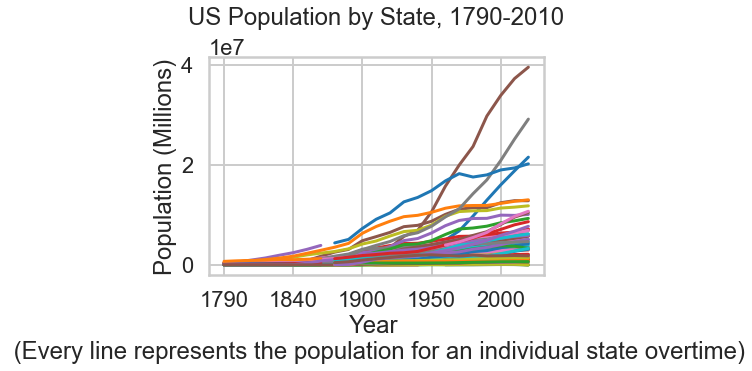

In [71]:
df.T.plot(legend=None)
plt.ylabel("Population (Millions)")
plt.xlabel('Year \n (Every line represents the population for an individual state overtime)')
plt.title("US Population by State, 1790-2010\n")

Text(0.5, 0, 'Year \n\n (Every line represents the population for an individual state overtime)')

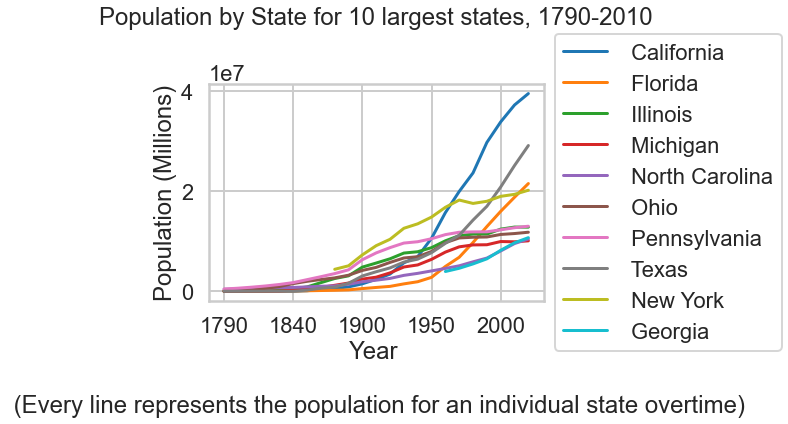

In [84]:
# let's look at just the 10 largest states (2010 population)
df.sort_values('2010', ascending=False)
"""
sort_values(by, axis=0, ascending=True, inplace=False, kind=‘quicksort’, na_position=‘last’)

①axis 如果axis=0，那么by=“列名”； 如果axis=1，那么by=“行名”；
②ascending: True则升序，可以是[True,False]，即第一字段升序，第二个降序
③inplace: 是否用排序后的数据框替换现有的数据框 ，True,或者False
④kind: 排序方法
⑤na_position : {‘first’, ‘last’}, default ‘last’，默认缺失值排在最后面

"""
#在2010里，排序最大值前十的
largest = df['2010'].nlargest(10).index
df[df.index.isin(largest)].T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Population by State for 10 largest states, 1790-2010\n\n")
plt.ylabel("Population (Millions)")
plt.xlabel('Year \n\n (Every line represents the population for an individual state overtime)')

也许它更感兴趣的是以占美国总人口的百分比来衡量，这样我们就可以看到相对变化…

Perhaps it will be more interested to view as percentage of total US population, so we can see relative change overtime…

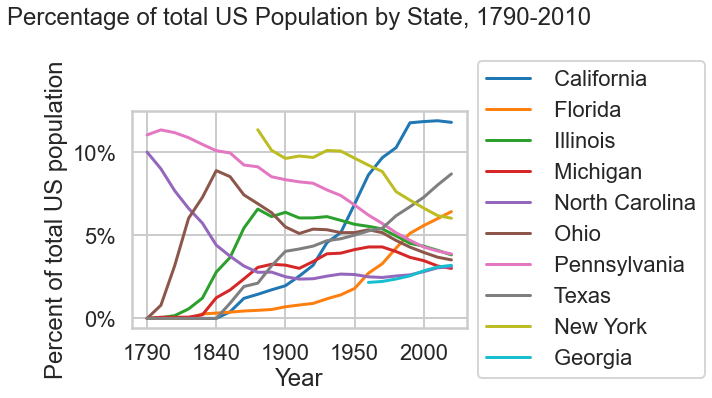

In [87]:
import matplotlib.ticker as mtick
cols = df.columns
by_percent = df[cols].div(df[cols].sum(axis=0), axis=1).multiply(100)
by_percent[by_percent.index.isin(largest)].T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Percent of total US population")
plt.xlabel("Year")
plt.title("Percentage of total US Population by State, 1790-2010\n\n\n")

# Make y-axis percentages 
ax = plt.gca()
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

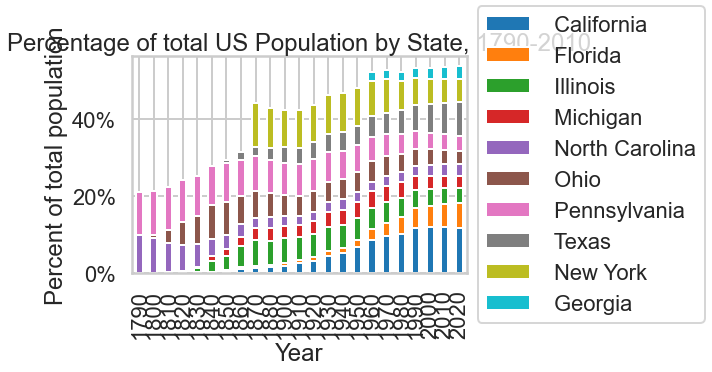

In [69]:
by_percent[by_percent.index.isin(largest)].T.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Percent of total population")
plt.xlabel("Year")
plt.title("Percentage of total US Population by State, 1790-2010")

ax = plt.gca()
ax.yaxis.set_major_formatter(yticks)